In [303]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [304]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [305]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [306]:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

df['Cholesterol'] = df['Cholesterol'].fillna(df.groupby(['Age', 'MaxHR'])['Cholesterol'].transform('median'))
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())

In [307]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

categorical_cols = X.select_dtypes(exclude='number').columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180.0,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283.0,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214.0,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195.0,0,122,0.0,True,False,True,False,True,False,False,False,True


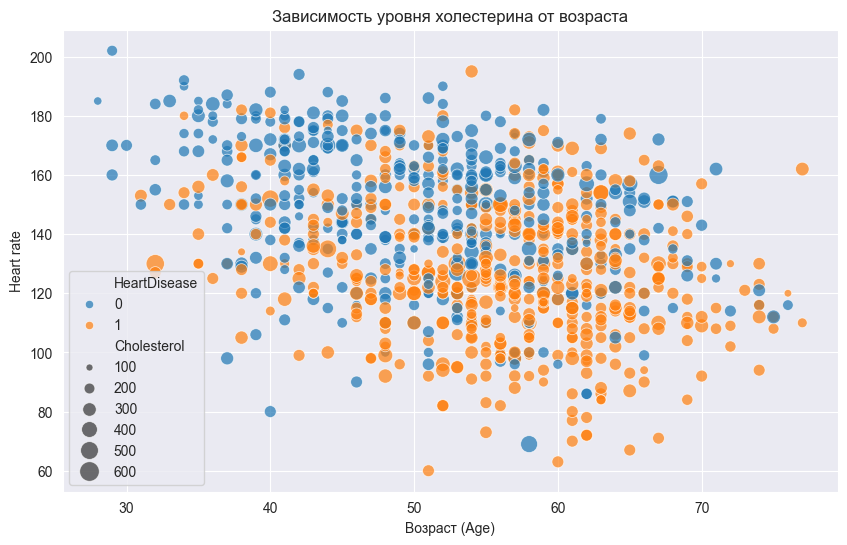

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='MaxHR',
    hue='HeartDisease',
    size='Cholesterol',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Зависимость уровня холестерина от возраста')
plt.xlabel('Возраст (Age)')
plt.ylabel('Heart rate')
plt.show()

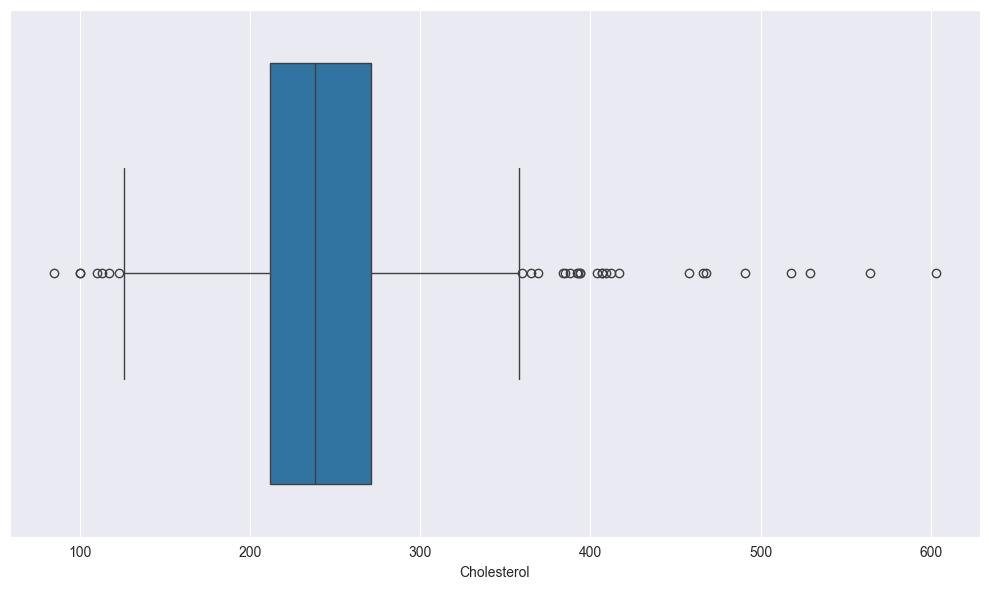

In [309]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cholesterol'])
plt.tight_layout()
plt.show()

In [310]:
def feat_imp(model, X_train):
    imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    return imp

def bar_plot_imp(imp):
    plt.title('Top 5 feature importances')
    plt.xlabel('Features')
    plt.ylabel('Gini')
    plt.bar(imp.head(5).index, imp.head(5).values)
    plt.xticks(rotation=45)
    plt.show()

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        77
           1       0.84      0.79      0.81       107

    accuracy                           0.79       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.79      0.79       184

ST_Slope_Up          0.398031
Cholesterol          0.085045
MaxHR                0.084745
Oldpeak              0.083442
RestingBP            0.079045
Age                  0.074193
ExerciseAngina_Y     0.069146
Sex_M                0.060460
ChestPainType_NAP    0.022771
FastingBS            0.015457
ChestPainType_ATA    0.011223
ST_Slope_Flat        0.009024
RestingECG_ST        0.004672
ChestPainType_TA     0.002748
RestingECG_Normal    0.000000
dtype: float64


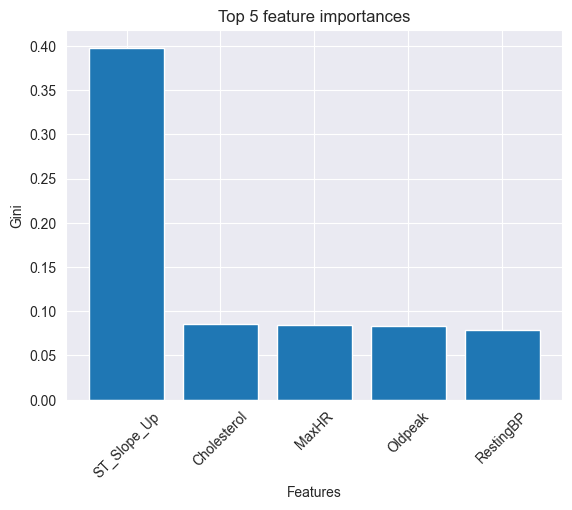

In [311]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

dtc_cr = classification_report(y_test, y_pred_dtc)
print(dtc_cr)

dtc_feat_imp = feat_imp(dtc_model, X_train)
print(dtc_feat_imp)

bar_plot_imp(dtc_feat_imp)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

ST_Slope_Up          0.143518
ST_Slope_Flat        0.120284
Oldpeak              0.119802
MaxHR                0.114354
ExerciseAngina_Y     0.096267
Age                  0.094995
Cholesterol          0.074308
RestingBP            0.066333
ChestPainType_ATA    0.046979
Sex_M                0.040977
FastingBS            0.026770
ChestPainType_NAP    0.023992
RestingECG_Normal    0.014887
RestingECG_ST        0.008870
ChestPainType_TA     0.007665
dtype: float64


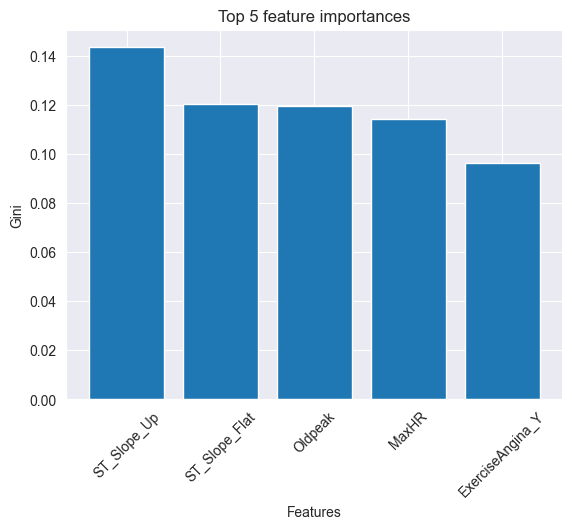

In [312]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

rfc_cr = classification_report(y_test, y_pred_rfc)
print(rfc_cr)

rfc_feat_imp = feat_imp(rfc_model, X_train)
print(rfc_feat_imp)

bar_plot_imp(rfc_feat_imp)

In [313]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(RandomForestClassifier(), n_estimators=10, max_samples=0.5, max_features=0.5,
                            random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

bagging_cr = classification_report(y_test, y_pred_bagging)
print(bagging_cr)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        77
           1       0.89      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



In [314]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

lsvc_model = LinearSVC()
lsvc_model.fit(X_train, y_train)

stacking_clf = StackingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
                                   ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
                                   ('LinearSVC', LinearSVC(random_state=42))],
                                  final_estimator=LogisticRegression(max_iter=1000, random_state=42))
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
stacking_cr = classification_report(y_test, y_pred_stacking)
print(stacking_cr)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

